1. 감마보정

In [7]:
# OpenCV의 출력 함수 예시
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("../data/images/yummy.jpg")
cv2.imshow("original", img)
cv2.waitKey(0)

-1

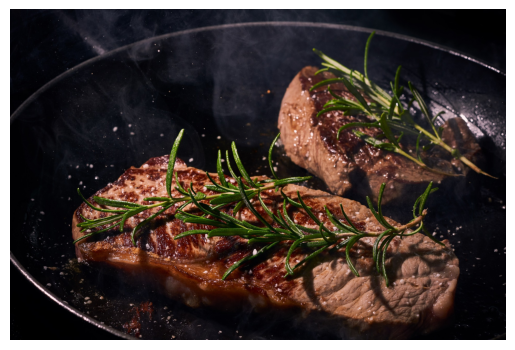

In [12]:
# 감마 보정
# 감마값 1보다 크면 밝아지고, 작으면 어두워짐
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("../data/images/yummy.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# openCV =  BRG
# matplotlib =  RGB
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

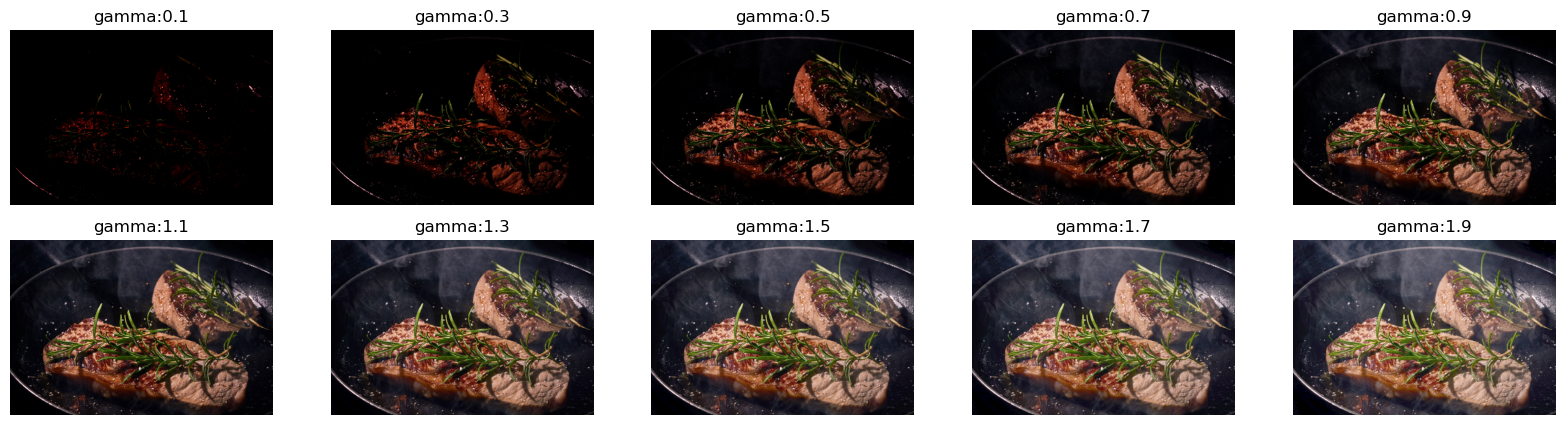

In [13]:
import numpy as np
plt.figure(figsize=(20,5))
gamma = np.arange(0.1, 2.0, 0.2)
for i, g in enumerate(gamma):
    plt.subplot(2, 5, i+1)
    out = image_rgb.copy()
    out = image_rgb.astype(np.float64)
    out = ((out / 255) ** (1 / g)) * 255
    out = out.astype(np.uint8)
    plt.title(f'gamma:{g:.1f}')
    plt.imshow(out)
    plt.axis("off")
plt.show()

2. 대칭

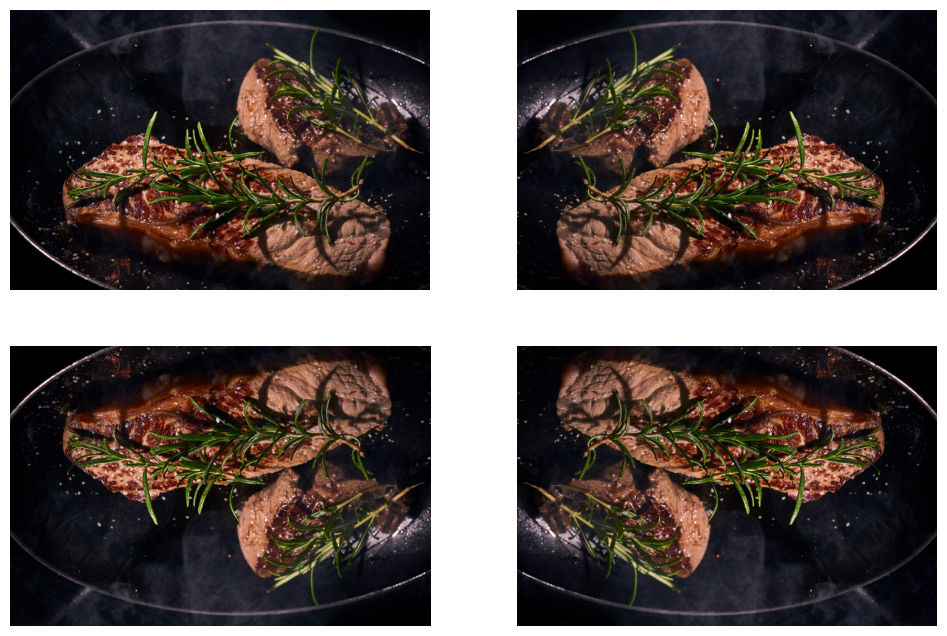

In [14]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
img = cv2.imread("../data/images/yummy.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(2,2,1)
plt.imshow(image_rgb)
plt.axis("off")
options=[1,0,-1] # 좌우, 상하, 상하좌우
for idx,option in enumerate(options):
    dst = cv2.flip(img, option)
    image_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,idx+2)
    plt.imshow(image_rgb)
    plt.axis("off")
plt.show()

3. 색상반전

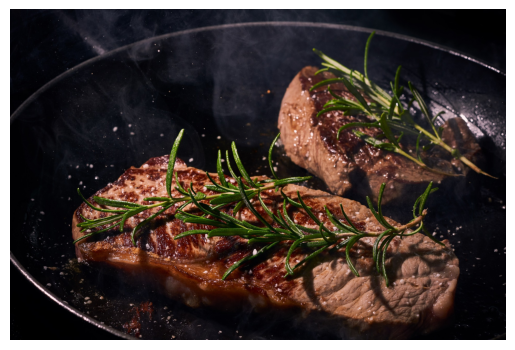

In [15]:
# 색상 반전: 어두운 부분은 밝게, 밝은 부분은 어둡게
# 255 - 픽셀값
# 200 => 255 - 200 = 55
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("../data/images/yummy.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

[[12  4  4]
 [13  5  5]
 [13  5  5]
 [14  6  6]
 [13  5  5]]
[[243 251 251]
 [242 250 250]
 [242 250 250]
 [241 249 249]
 [242 250 250]]


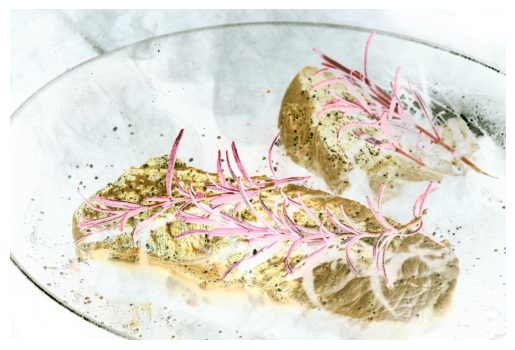

In [16]:
out = img.copy()
print(out[0][0:5])
out = 255 - out
print(out[0][0:5])
plt.imshow(out)
plt.axis("off")
plt.show()

4. 이진화

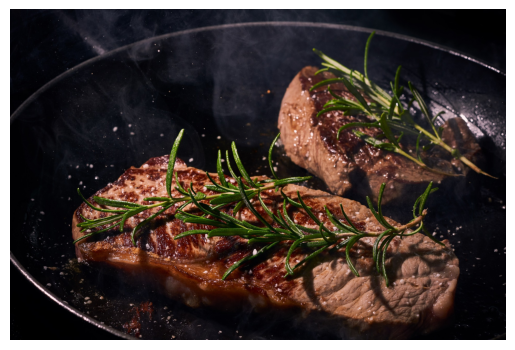

In [17]:
# 영상 이진화
# 특정한 경계값을 기준으로 0,255로 만드는 작업
# 경계가 뚜렷해짐
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../data/images/yummy.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [18]:
# 픽셀값 127을 기준으로 0,255로 나누는 작업
ret, dst = cv2.threshold(image_rgb, 127, 255, cv2.THRESH_BINARY)
# print(ret) #경계값
# print(dst) #출력값

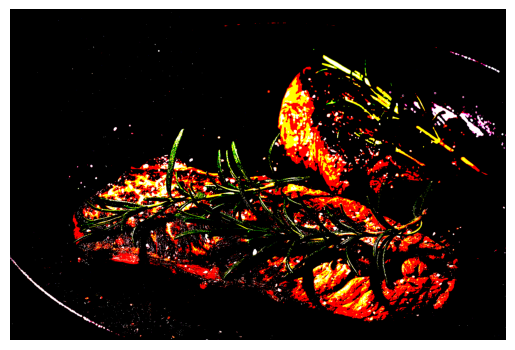

In [19]:
plt.imshow(dst, cmap="gray")
plt.axis("off")
plt.show()

5. 적응형 이진화

In [20]:
# Adaptive Threshold, 적응형 이진화 : 픽셀마다 다른 임계값을 적용하는 방식
# 전역 이진화 : 모든 픽셀에 같은 임계값을 적용하는 방식. 이진화를 수해하는 방식
# 예) 조명의 변화나 반사가 심한 경우

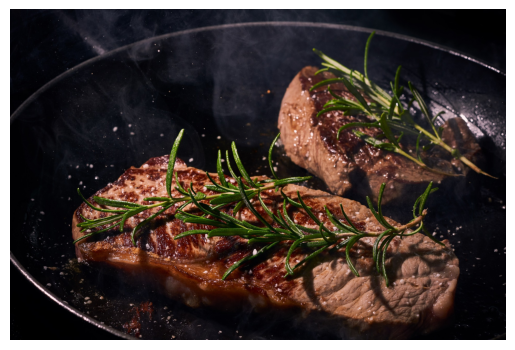

In [21]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("../data/images/yummy.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# adaptiveThreshold(입력이미지, 최대값, 적응형 이진화 플래그, 임계값 형식, 블록 크기, 감산값)
# cv2.ADAPTIVE_THRESH_MEAN_C : 모든 픽셀에 평균 가중치 적용
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 모든 픽셀에 중심점으로부터의 거리에 대한 가중치 적용
# binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 467, 37)
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 467, 37)

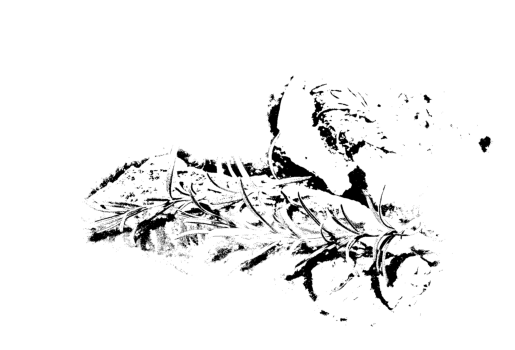

In [23]:
image_rgb = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

6. 회전